In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
conn = sqlite3.connect('factbook.db')
query = "select min(population),max(population),min(population_growth),max(population_growth) from facts"
df = pd.read_sql_query(query,conn)
conn.close()

In [3]:
df

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
df.columns

Index(['min(population)', 'max(population)', 'min(population_growth)',
       'max(population_growth)'],
      dtype='object')

In [5]:
conn2 = sqlite3.connect('factbook.db')
query = "select population,population_growth,birth_rate,death_rate from facts where (population !=(select min(population) from facts) or population!=(select max(population) from facts)) "
df2 = pd.read_sql_query(query,conn2)
conn2.close()

In [6]:
df2.dropna(inplace=True)


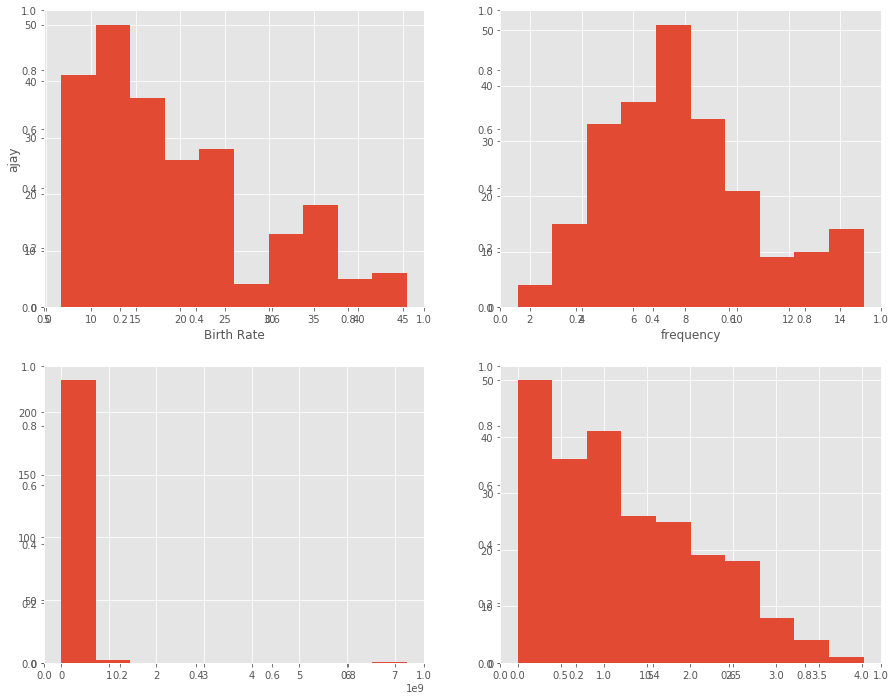

In [9]:
plt.style.use('ggplot')
fig,ax = plt.subplots(2,2,figsize=(15,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.hist(df2.birth_rate.values,bins=10)
ax1.set_xlabel('Birth Rate')
ax1.set_ylabel('ajay')
ax2.hist(df2.death_rate.values,bins=10)
ax2.set_xlabel('Death Rate')
ax2.set_xlabel('frequency')
ax3.hist(df2.population.values,bins=10)
ax4.hist(df2.population_growth.values,bins=10)
plt.show()